In [3]:
"""Librairies nécessaires"""

import pandas as pd
from pandas import json_normalize
import geopandas as gpd

import numpy as np

import matplotlib.pyplot as plt

import json

from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points

from tqdm import tqdm

!pip install unidecode
from unidecode import unidecode

!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

import pickle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.8 MB/s eta 0:00:00 0:00:01


/opt/mamba/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [7]:
"""Changement de directory pour lire les fichiers"""
import os
os.getcwd() #trouver le directory actuel 
os.chdir('/home/onyxia/work/Projet-Stat-App-2A')

In [8]:
"""Lecture du fichier des lycées"""
emplacement_lycées = '3.0) Enrichissement données/Données/Lycées_idf.geojson'
df_lycées_idf = gpd.read_file(emplacement_lycées, low_memory=False, index_col=0)

In [10]:
"""Restriction aux lycées parisiens"""

var_interet = ['code_academie', 'academie', 'dep',
       'nature_uai', 'patronyme', 'nom_etablissement', 'statut',
       'contrat_etablissement', 'adresse_postale', 'code_postal', 'code_insee', 'geometry']

df_lycées_idf = df_lycées_idf.loc[:,var_interet]

df_lycées_paris = df_lycées_idf.loc[df_lycées_idf['dep']=='75']

#patronyme_modif pour faciliter le traitement par la suite
df_lycées_paris['patronyme_modif'] = df_lycées_paris['patronyme'].apply(lambda x: unidecode(x.replace(' ', '').replace('-', '')).upper())

/opt/mamba/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [11]:
"""Chargement des données administratives de Paris intra muros"""

paris_arrondissement = gpd.read_file('2) Visualisation/Données_carto/paris_arrondissements.geojson')

In [12]:
df_lycées_paris.head()

,code_academie,academie,dep,nature_uai,patronyme,nom_etablissement,statut,contrat_etablissement,adresse_postale,code_postal,code_insee,geometry,patronyme_modif
11,001,Paris,75,lycée polyvalent,SIMONE-WEIL,Lycée polyvalent Simone Weil,public,NaN,7 rue de Poitou,75003,75103,POINT (2.36403 48.86135),SIMONEWEIL
12,001,Paris,75,lycée d'enseignement général,CONDORCET,Lycée Condorcet,public,NaN,8 RUE DU HAVRE,75009,75109,POINT (2.32693 48.87481),CONDORCET
13,001,Paris,75,lycée d'enseignement général,BOSSUET-NOTRE-DAME,Lycée privé Bossuet Notre-Dame,privé,lycée privé sous contrat Éducation nationale,17 RUE YVES TOUDIC,75010,75110,POINT (2.36323 48.87043),BOSSUETNOTREDAME
14,001,Paris,75,lycée professionnel,DU BREUIL - PARIS,Ecole du Breuil Arts et Techniques du Paysage,privé,privé sous contrat hors EN,Route de la ferme,75012,75112,POINT (2.45671 48.82319),DUBREUILPARIS
15,001,Paris,75,lycée d'enseignement général,NOTRE-DAME-DE-FRANCE,Lycée privé Notre-Dame de France,privé,lycée privé sous contrat Éducation nationale,63 RUE DE LA SANTE,75013,75113,POINT (2.34136 48.83306),NOTREDAMEDEFRANCE


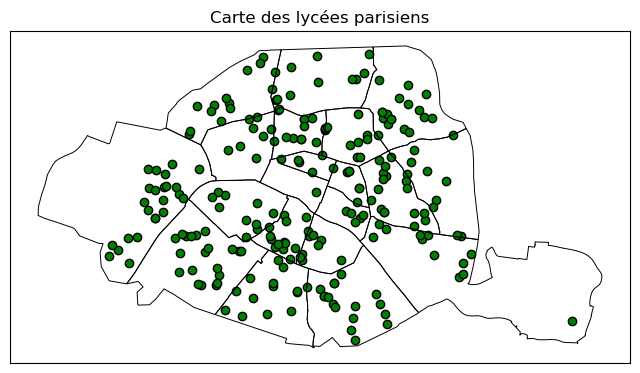

In [13]:
"""Visualisation des lycées parisiens"""

fig, ax = plt.subplots(figsize=(8, 7))

paris_arrondissement.boundary.plot(ax=ax, edgecolor = "black", linewidth = 0.7) #on ajout les arrondissements parisiens en rouge

df_lycées_paris.plot(ax=ax, color='green', alpha=1, edgecolor='black', linewidth=1) #on ajoute les lycées

#rien sur les axes
plt.xticks([], [])
plt.yticks([], [])

#titre
plt.title('Carte des lycées parisiens')
plt.savefig('3.0) Enrichissement données/Sorties_cartes/carte_lycées_paris.png')
plt.show()

In [195]:
"""On cherche les 100 meilleurs lycées seulement : on prend la liste du classement figaro"""

import requests
from bs4 import BeautifulSoup

# URL du classement des lycées à Paris
url = 'https://classement-lycees.etudiant.lefigaro.fr/ville-paris+75056/'

# Récupérer le contenu HTML de la page
response = requests.get(url)
html_content = response.content

# Utiliser BeautifulSoup pour parser le HTML
soup = BeautifulSoup(html_content, 'html.parser')

# Trouver les noms des lycées dans le classement
lycees_classement = [lycee.find('b').text.strip() for lycee in soup.find_all('td', class_='school')]

# Passer tous les noms en majuscule, retirer la partie 'LYCEE ' des noms
lycees_liste = [unidecode(lycee.replace('Lycée ', '').replace('LYCEE ', '').replace('-', '').replace(' ', '').upper()) for lycee in lycees_classement]

#changer l'écriture de Henri IV
for i in range(len(lycees_liste)):
    lycees_liste[i] = lycees_liste[i].replace('HENRI-IV', 'HENRI IV')

#afficher la liste
#lycees_liste

"""
La liste a été enregistrée ici : 
3.0) Enrichissement données/Données/liste_meilleurs_lycées.pkl
"""

'\nLa liste a été enregistrée ici : \n3.0) Enrichissement données/Données/liste_meilleurs_lycées.pkl\n'

In [15]:
"""Charger la liste des meilleurs lycées"""

emplacement_liste = '3.0) Enrichissement données/Données/liste_meilleurs_lycées.pkl'

with open(emplacement_liste, 'rb') as fichier:
    liste_meilleurs_lycées = pickle.load(fichier)[:50] #prendre les x meilleurs

In [17]:
"""Fonction pour vérifier la similarité"""
def has_similar_name(name, lycees_liste):
    for element in lycees_liste:
        # Calculer le ratio de similarité
        similarity_ratio = fuzz.ratio(name, element)
        # Si le ratio est supérieur à une certaine valeur (par exemple, 80), considérez-le comme une correspondance
        if similarity_ratio > 77:
            return True
    return False

In [18]:
"""Création du dataframe df_meilleurs_lycées_paris contenant seulement le nombre de lycées qu'on a fixé"""

# Appliquer la fonction pour créer une colonne de vérification de similarité
df_lycées_paris['similar_name'] = df_lycées_paris['patronyme_modif'].apply(lambda x: has_similar_name(x, liste_meilleurs_lycées))

# Filtrer les données en fonction de la colonne de similarité
df_meilleurs_lycées_paris = df_lycées_paris[df_lycées_paris['similar_name'] | df_lycées_paris['patronyme_modif'].isin(liste_meilleurs_lycées)]

# Supprimer la colonne temporaire 'similar_name'
df_meilleurs_lycées_paris = df_meilleurs_lycées_paris.drop(columns=['similar_name'])

/opt/mamba/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [19]:
"""Vérification du nombre de lycées retenus"""
df_meilleurs_lycées_paris.shape

(48, 13)

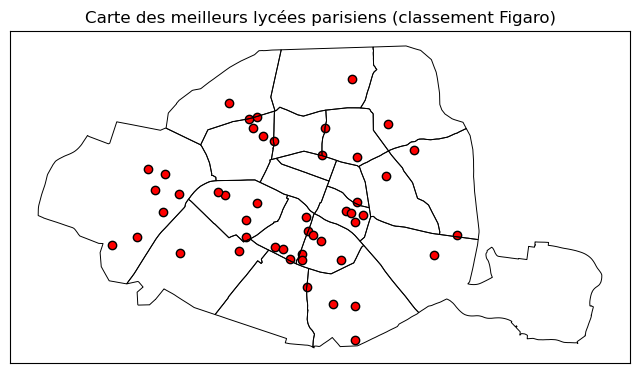

In [20]:
"""Visualisation des meilleurs lycées parisiens"""

fig, ax = plt.subplots(figsize=(8, 7))

paris_arrondissement.boundary.plot(ax=ax, edgecolor = "black", linewidth = 0.7) #on ajout les arrondissements parisiens en rouge

df_meilleurs_lycées_paris.plot(ax=ax, color='red', alpha=1, edgecolor='black', linewidth=1) #on ajoute les lycées

#rien sur les axes
plt.xticks([], [])
plt.yticks([], [])

#titre
plt.title('Carte des meilleurs lycées parisiens (classement Figaro)')
plt.savefig('3.0) Enrichissement données/Sorties_cartes/carte_meilleurs_lycées_paris.png')
plt.show()

In [229]:
"""Fonction qui merge les data set en trouvant le lycée (point) le plus proche et enregistre la distance (en km)"""

def ajout_meilleurs_lycées(dvf, df_lycees):

    #sélection des variables
    var_lycees = ['patronyme', 'geometry']
    df_lycees = df_lycees[var_lycees].copy()
    
    #Passer en projection 2D
    proj_lambert = 'EPSG:3942'
    dvf = dvf.to_crs(proj_lambert)
    df_lycees = df_lycees.to_crs(proj_lambert)

    #jointure spatiale
    merged_nearest = gpd.sjoin_nearest(dvf, df_lycees, how="left", max_distance=5000, distance_col="dist_min_lycee")

    #dist en km
    merged_nearest['dist_min_lycee'] = merged_nearest['dist_min_lycee']/1000

    #repasser en système de projection wgs 84
    dvf_avec_lycees = merged_nearest.to_crs('EPSG:4326')

    #supprimer et renommer colonnes
    dvf_avec_lycees = dvf_avec_lycees.drop(['index_right'], axis=1)    
    dvf_avec_lycees = dvf_avec_lycees.rename(columns={'patronyme': 'nom_lycee'})

    return dvf_avec_lycees

In [226]:
"""Chargement fichier dvf"""

#chemin du fichier dvf
path_folder = '1.2) Données concat/'
name_file = 'dvf_concat_2021_to_2023.geojson'
path_file = path_folder + name_file

#lecture du fichier dvf
dvf = gpd.read_file(path_file)


In [230]:
"""Ajout des lycées"""

dvf_avec_lycees = ajout_meilleurs_lycées(dvf, df_meilleurs_lycées_paris)

In [233]:
"""Exportation"""

#chemin export
outer_path = '3.1) Données enrichies/'
outer_name = 'dvf_concat_2021_to_2023_avec_lycees.geojson'

#exportation
dvf_avec_lycees.to_file(outer_path+outer_name, driver='GeoJSON')